<center>
<h1>Chapter Three</h1>
</center>

<hr>

##Bring in puddles

<img src='http://1.bp.blogspot.com/-Rbckf35EM5g/VgCFNBfLBvI/AAAAAAAAGRY/5wIQpScWToY/s1600/4257_oregon_ducks-alternate-2013.png' height=50>

In [1]:
%%capture
!pip install uo-puddles
from uo_puddles.good_ai import *

##And let's get back to the loan data

In [2]:
loan_url = 'https://raw.githubusercontent.com/rafickas/data/main/loan.csv'
#loan_url = 
loan_table = up_get_table(loan_url)
loan_table

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#I. Data wrangling
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

Here's the problem. The AI algorithms we will look at want their data in a very specific form. And they are not flexible about it.

It is their way or the highway. You probably know some people like this.

This forces us to get our data in shape. The jargony name is data wrangling. We will look at the following data wrangling steps:

1. Dropping columns. If we do not think they are useful, we can just remove them from the table. Hopefully not on a whim!

2. Dropping rows with missing data. Don't like to do it, but can't work with missing data.

3. Mapping categorical columns to numeric. A good example is `Gender`. It has two category values. And both are strings. Not good. We need them to be two numbers.

4. Looking for outliers. They are a fly in the ointment. They may be real values, e.g., someone is trying to borrow a billion dollars, or may be typos. We need to deal with them.

5. We need apples to apples. If two columns are on a different scale, it will confuse poor Euclid. For instance, the `Credit_History` column has only 2 values: 0 and 1. The `ApplicantIncome` column is in the thousands. They are way out of scale with each other. Our goal is bring them into the same scale.


###Let's get started!

#One big heads up

Everytime I make a change to the table, I am going to store it in a new variable. This has the downside of having lots of variables that are versions of the table. I end up with at least 10 versions each with its own variable.

But I think it is worth it. If we run a cell twice by accident we can avoid screwing everything up. And if we name our variables well, we can see them as a sequence.

#II. Dropping columns
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

The good news is that puddles supplies us with a function to drop a column. It does not actually change the original table. It gives us a new table with the column missing

##The harder question is what to drop?

This is where you have to use some human judgement. Potentially, all columns might contain information that is useful. And you generally do not want to lose information.

##My decision is to drop the `Loan_ID` column

Maybe there is some hidden information in an ID, but I don't see it. So I am dropping it.

In [3]:
wrangled_loan_table_1 = up_drop_column(loan_table, 'Loan_ID')  #all puddles functions return copies so don't change original

###You can use slicing on a table!

You saw how to use slicing on strings. You can also use it on a table to get slices of rows.

In [4]:
wrangled_loan_table_1[:5]  #Loan_ID is gone

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###How about the last 5 rows?

In [5]:
wrangled_loan_table_1[-5:]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


###You can see you can omit part of slice

* If you omit first, it assumes 0, e.g., [:5] is same as [0:5].

* If you omit last, it assumes to the end, e.g., [-5:].

* If you use negative numbers, it refers to the right end, e.g., [-5:] says start 5 back from the end and go to the end. Or another example: [:-5] says everything up to but not including last 5.

###I can divide the table into 2 pieces

In [6]:
first_half = wrangled_loan_table_1[:307]  #up to but not including row 307
second_half = wrangled_loan_table_1[307:]  #row 307 to end

###Let's move on to next wrangling step

#III. Dropping rows
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

If you look at the table above, you will see a `NaN` under `LoanAmount`. The `NaN` is puddles way of telling us this is a missing value.

## Not all NaNs the same

The question is how did the NaN end up there in the first place? Here is a general classification.

* Missing completely at random (MCAR). Cannot be tied to any known variable or event. Perhaps random data entry error. Contains no interesting information.

* Missing at random (MAR). A bit of a misnomer, the missing value is linked to a known cause. Perhaps one of the bank staff was bad at filling in data. So there is a cause: careless staff. But we have lost that information.

* Not missing at random (NMAR). Maybe some applicants did not want to give their marital status because of fear of discrimination.

The question is whether we can detect these 3 cases? If we have a NaN in the `Married` column, can I differentiate among these 3?



##I'll say no for now

In essence, I will view them as MCAR. If we have time later in quarter, we can look at some other ways to deal with missing values by trying to guess them. But for now, we will just delete all rows that contain a NaN value in any column. Puddles gives us a function to do this.


In [7]:
wrangled_loan_table_2 = up_drop_nan_rows(wrangled_loan_table_1)

In [8]:
len(wrangled_loan_table_1) - len(wrangled_loan_table_2)  #dropped 134 rows with one or more NaN values

134

#IV. Mapping columns
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

I am using the jargony term *map* to signify changing one value to another, i.e., map one value to another.

Puddles gives us a function for doing this to a specific column. However, the function asks us to use a new type of Python data called a *dictionary*. So let's take a side-tour to look at that.

##Python dictionary

First, let me say the name *dictionary* is a bit misleading here. It has nothing to do with looking up words and their definitions. And it is not ordered in any way, e.g., not ordered alphabetically.

What it is in essence is a collection of `key:value` pairs:

* The `key` can be a number or a string but is most typically a string. Keys must be unique. You cannot have duplicate keys.

* The `value` can be anything. A number, a string, a list, even a table.

Let me show you an example.

In [9]:
gender_dict = {'Male': 0, 'Female': 1}
gender_dict  #prints alphabetically but cannot count on that

{'Female': 1, 'Male': 0}

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg' 
height=50 align=center>

Post answer: [Mural link](https://app.mural.co/invitation/mural/cis4236034/1639511781261?sender=u173416b87b3b8c1cbe335790&key=3993cb03-56a9-4fe5-b4d9-6304e32ff459)

Build a dictionary for the `Married` column. Map the string values to integers.



In [10]:
married_dict = 
married_dict  #prints alphabetically but cannot count on that

SyntaxError: ignored

##Let's try a column mapping

Puddles has a function to help. It returns a new table with the mapping completed for the named column. It expects a dictionary to tell it what to map to what.

In [11]:
wrangled_loan_table_3 = up_map_column(wrangled_loan_table_2, 'Gender', gender_dict)
wrangled_loan_table_3[:5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg' 
height=50 align=center>

Post answer: [Mural link](https://app.mural.co/invitation/mural/cis4236034/1639511781261?sender=u173416b87b3b8c1cbe335790&key=3993cb03-56a9-4fe5-b4d9-6304e32ff459)

Map `Married` column and store in `wrangled_loan_table_4`.



In [12]:
wrangled_loan_table_4 = up_map_column(wrangled_loan_table_3, 'Married', {'Yes':0, 'No':1})

wrangled_loan_table_4[0:5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,0,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,0,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,0,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,0,0,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


##Hard to spot categorical columns

Check out the `Dependents` column. Looks like a numeric column, right? But let's do a little checking. I'll use a puddles function that gives a picture of all the columns.

In [13]:
up_get_column_types(wrangled_loan_table_4)

,Column,Type,Unique<10
0,Gender,int,...
1,Married,int,...
2,Dependents,str,"{1, 2, 0, 3+}"
3,Education,str,"{Not Graduate, Graduate}"
4,Self_Employed,str,"{Yes, No}"
5,ApplicantIncome,int,...
6,CoapplicantIncome,float,...
7,LoanAmount,float,...
8,Loan_Amount_Term,float,...
9,Credit_History,float,...


###`Dependents` is actually a string column!

We are back to that old problem of "This is not a pipe." These both produce the same output:
<pre>
print(0)
print('0')  #this is not a zero but prints as one
</pre>
So we are seeing the `Dependents` string values appearing as numbers. As I said, I think this is a bad choice on Python's part. Super confusing.

###Looks like 5 remaining string columns we have to deal with

I'll leave them as challenges.

#V. Outliers
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

Given a continuous column (i.e., one that has more than 10 unique numeric values), what should we consider an outlier value in the column? That is question 1.

Question 2 is once we identify an outlier, what should we do with it?

First let's look at question 1, how to identify outliers in a column.

##The 3Sigma rule

*Sigma* is the jargony name for the standard deviation.

The 3Sigma rule says compute a boundary wall on either side of the mean that is 3*sigma out. Values beyond that boundary wall may be considered outliers. So we add, to the mean, 3 times the standard deviation to get the upper boundary and minus 3 times the standard deviation to get the lower boundary. Let's do that.
The lowercase Greek letter mu (µ) represents the mean.

<img src='https://www.researchgate.net/profile/Bin-Wang-103/publication/273955667/figure/fig3/AS:339883190177813@1458045875582/The-confidence-intervals-correspond-to-3-sigma-rule-of-the-normal-distribution.png' height=200>

The diagram is in a perfect world where our column values form a bell-shape distribution. Let's check out the reality of a column using a new puddles function.


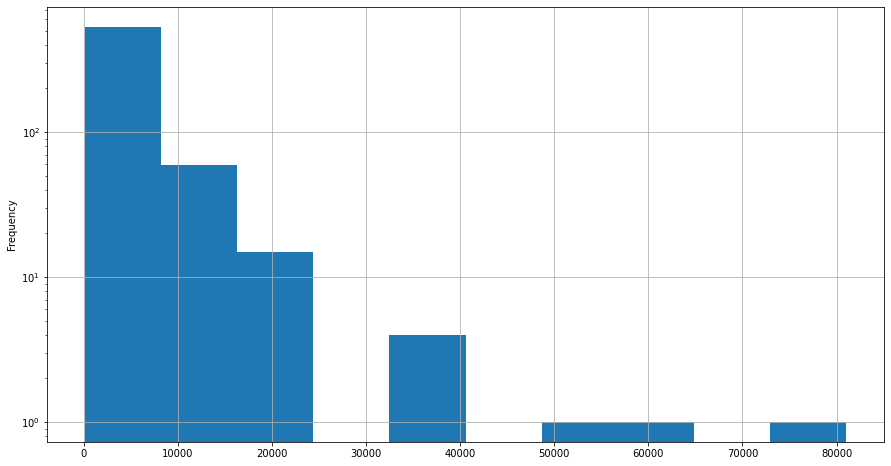

In [14]:
up_column_histogram(loan_table, 'ApplicantIncome')

###So much for a perfect world!

The distribution above is called **right**-skewed (seems a little counter-intuitive to me).

The question is whether those values at far right should be viewed as outliers. They kind of look like it, right? Maybe they should have been 8000 but someone accidentally added a 0.

###Let's see what 3Sigma tells us

We will need two things for doing the computation:

1. The mean of the `ApplicantIncome` column.

2. The standard deviation of the `ApplicantIncome` column.

Once we have those two, we should have enough to compute the two walls. And see if column values are beyond those walls (i.e., are outliers).

###The mean

I think we already have the tools for this. My plan is to:

1. Get the column values into a list.

2. Use the `sum` function to sum the values.

3. Get the length with `len` and divide.

VOILÀ : I have the mean.

In [15]:
apin_list = up_get_column(wrangled_loan_table_4, 'ApplicantIncome')
apin_mean = sum(apin_list)/len(apin_list)
apin_mean

5364.23125

###Standard Deviation is harder

Here is the fancy math defintion.

<img src='https://www.dropbox.com/s/cblzn20cxng156p/Screen%20Shot%202021-04-04%20at%2012.06.28%20PM.png?raw=1' height=150>

Mathematicians love their symbols! We saw the mu μ stands for the mean. The upper-case sigma Σ stands for summation.

I am going to borrow from this site, which I think gives a good explanation of standard deviation in more understandable terms: [Standard Deviation in pictures](https://www.mathsisfun.com/data/standard-deviation.html).

* The Standard Deviation is a measure of how spread out numbers are.

* Its symbol is σ (the lower-case greek letter sigma).

* The formula is easy: it is the square root of the *Variance*. So now you ask, "What is the *Variance*?"

The Variance is defined as: "The average of the squared differences from the Mean."

Sounds complicated so let's list the steps to calculate the variance:

1. Work out the Mean (the simple average of the numbers). We've done that before!

2. Then for each number in the list: subtract the Mean and square the result (the squared difference). Put the squared difference in a new list.

3. Then work out the average of those squared differences. You have them in a list, so can use `sum` and `len` functions as usual.

###I was a little glib for step 2.

What we need to do is "visit" every item in `apin_list`, one by one, and get a squared difference. Then we need to take that and place it in a new list. Where does this new list come from?

 We build it :)

##A side-tour into loops

We will need some new Python to compute the Variance as I have stated the steps above. I'd like to say the new piece is easy. It is not :(


The jargony term for what we need to visit every item is a loop. I am going to show you two different ways to loop to get the Variance. You can decide which appeals to you the most.

###Please do not get discouraged!

 Loops are notoriously hard to understand for beginners. So hang in there!

##A for-loop

I'll first show you the use of a Python for-loop to compute the first part of the Variance then discuss.

In [16]:
sq_diff_list = []  #starts out empty - we will add on to it, bit by bit in the loop

for item in apin_list:
  #loop body has to be indented
  result = (item - apin_mean)**2
  sq_diff_list = sq_diff_list + [result]  #add 2 lists together to get a new list

sq_diff_list[0:5]  #notice that this is not indented. If it was, it would be part of loop body


[610322.2659765622,
 5589589.403476561,
 7735247.265976561,
 404201.90347656276,
 2784.540976562519]

###Let's talk about this

Here are the pieces of a for-loop:

* **The for-loop header**.
<pre>
for item in apin_list:
</pre>
What this does is grab a value out of `apin_list`, one by one, and do a variable assignment (MS) into the variable `item`.

* **The for-loop body**.
<pre>
   #loop body has to be indented
   result = (item-apin_mean)**2
   sq_diff_list = sq_diff_list + [result]  #add 2 lists together to get a new list
</pre>
Notice that it is indented. That is how Python knows it is the loop body. The loop body is repeated, once for each new assignment to the variable `item`.

* **The new list builder**.
<pre>
   sq_diff_list = sq_diff_list + [result]  #add 2 lists together to get a new list
</pre>
You can see this in the loop body. It's a bit surprising that Python allows us to use a plus-sign to add 2 lists instead of 2 numbers. But it does. What this line of code does abstractly is keep adding on new results to our new list, which I have called `sq_diff_list`.

* **End of the loop body**.
<pre>
sq_diff_list[0:5]
</pre>
Why is this an end? Because it is no longer indented. As soon as Python sees a non-indented line of code, it says that's it, I now know where the loop body ends.



Let me show off a smaller example. DO NOT RUN THE CODE YET.

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg' 
height=50 align=center>

Anyone want to predict what will be printed before I (or you) run the code below?

BTW: this is not an easy problem. It forces you to simulate, in your head, what the code will do when it runs.



In [18]:
new_list = []
small_list = [4,6,1,2]

for item in small_list:
  print(f'item: {item}')
  result = 2*item
  new_list = new_list + [result]
  print(f'new_list: {new_list}')

print(f'done. new_list: {new_list}')

item: 4
new_list: [8]
item: 6
new_list: [8, 12]
item: 1
new_list: [8, 12, 2]
item: 2
new_list: [8, 12, 2, 4]
done. new_list: [8, 12, 2, 4]


In [19]:
'''
4
[8]
6
[8,12]
1
[8,12,2]
2
[8,12,2,4]
done ..
'''

'\n4\n[8]\n6\n[8,12]\n1\n[8,12,2]\n2\n[8,12,2,4]\ndone ..\n'

##A list-comprehension as alternative to for-loop

It sounds scary right from the get-go! The term *comprehension* comes from Math, always a jargony realm.

But here is the equivalent to the for-loop above in list-comprehension form.

In [20]:
sq_diff_list = [(item-apin_mean)**2 for item in apin_list]  #a list comprehension at work
sq_diff_list[0:5]

[610322.2659765622,
 5589589.403476561,
 7735247.265976561,
 404201.90347656276,
 2784.540976562519]

###Let's talk about this

Here are the pieces of a list-comprehension:

* **The square-brackets**.
<pre>
= [ ... ]
</pre>
They are the beginning and the end of the list-comprehension. So hard part is what goes between them.

* **The for-loop look-a-like**.
<pre>
[ ... for item in apin_list]
</pre>
Works same as for-loop header. Assigns the variable `item`, one at a time, to values in `apin_list`. Confusing because it is now at end of the "loop" instead of starting it off. This is a choice the Python designers made. They could have put it at beginning. But chose to put it at end.

* **The new list builder**.
<pre>
[(item-apin_mean)**2 ...]
</pre>
This is equivalent to the for-loop body where a result is computed and then do list addition with plus-sign. But it all happens behind the scenes now.


<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg' 
height=50 align=center>

Post answer: [Mural link](https://app.mural.co/invitation/mural/cis4236034/1639511781261?sender=u173416b87b3b8c1cbe335790&key=3993cb03-56a9-4fe5-b4d9-6304e32ff459)

Write the equivalent of the for-loop below in form of a list-comprehension.



In [21]:
small_list = [4,6,1,2]

In [22]:
#for-loop version
new_list = []
for item in small_list:
  new_list = new_list + [2*item]
print(f'done. new_list: {new_list}')

done. new_list: [8, 12, 2, 4]


In [24]:
#list comprehension version
new_list = 
print(f'done. new_list: {new_list}')

SyntaxError: ignored

###Which is better?

**Case for and against for-loop:**

* It is a swiss-army knife. It can do lots of things. Not just build new lists from old ones. You can put anything in the loop body.

* A lot of code to get right. Easy to make a mistake.

* It is easier to debug. You can put variables and `print` statements in the loop body and see how things are progressing.


**Case for and against list-comprehension**: 

* It is one line of code. Less prone to making typing mistakes or leaving something out.

* However, it is difficult to debug. You cannot use `print` statements to see what is going on. You cannot define intermediate variables.

* It is a bit convoluted in its syntax.

* It has really one job: build a new list from an old list. On the plus side, that is mostly what we will be doing when we are wrangling columns (lists of items) in a table.

I'll try to show both versions at least for a litte while so you can decide which you like best.

###Complete the Variance

We have the squared-diff list. Now get average.

In [25]:
apin_variance = sum(sq_diff_list)/len(sq_diff_list)
apin_variance

32062136.673606828

###We are ready to compute standard deviation

We have done the hard work with the Variance. Now just take the square-root to get the standard deviation.

In [26]:
apin_sigma = apin_variance**.5
apin_sigma

5662.343743857911

###Compute the two boundaries of 3Sigma

In [27]:
apin_upper_boundary = apin_mean + 3*apin_sigma
apin_upper_boundary

22351.262481573733

In [28]:
apin_lower_boundary = apin_mean - 3*apin_sigma
apin_lower_boundary

-11622.799981573731

##Ready for question 2: how to handle outliers?

I am going to take a simple approach. I'll move any values beyond the walls to the walls. It is called *clipping*. And Puddles has a function for it.

In [29]:
apin_clipped = up_clip_list(apin_list, apin_lower_boundary, apin_upper_boundary)
apin_clipped[0:5]

Lower items clipped: 0
Upper items clipped: 5


[4583, 3000, 2583, 6000, 5417]

##Now need to replace old column values with clipped ones

We can use a new puddles function. We have seen `up_get_column` for getting the values in a column. Here is a new one, `up_set_column` for resetting the values in a column. Ying and Yang.

In [30]:
wrangled_loan_table_5 = up_set_column(wrangled_loan_table_4, 'ApplicantIncome', apin_clipped)

#Stop here for challenges



##What to avoid

I know some of you have had prior programming experience. And you may be used to using an index variable as your loop variable. Here is how you do it in Python.

In [31]:
for i in range(5):
  print(i)

0
1
2
3
4


##You should rarely need this `range` style of loop

We are almost always looping over a list of items. So use what Python gives you to do that. It is a lot cleaner.

###So not this

In [32]:
a_list = [5,6,1,3]

In [33]:
for i in range(len(a_list)):
  item = a_list[i]
  print(item)

5
6
1
3


###This instead

In [34]:
for item in a_list:
  print(item)

5
6
1
3


#Challenge 1
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

Let's do some practice with loops. I'll give you a list. Please square each item and place in new list. Use both alternatives, for-loop and list-comprehension.

In [35]:
#here is existing list

a_list = [9, 4.5, 3, 100.34, 6]

##Problem 1.1

Use a for-loop to do squaring.

Here is what I ended up with in my new list:
<pre>
[81, 20.25, 9, 10068.115600000001, 36]
</pre>

In [36]:
new_list = [9, 4.5, 3, 100.34, 6]
for item in new_list:
  new_list = [item**2]
  print(f'done. new_list: {new_list}')

done. new_list: [81]
done. new_list: [20.25]
done. new_list: [9]
done. new_list: [10068.115600000001]
done. new_list: [36]


##Problem 1.2

Now use a list-comprehension for squaring.

Should get same result.

In [37]:
new_list= [9, 4.5, 3, 100.34, 6]
new_list = [item**2 for item in new_list]
print(f'done. new_list: {new_list}')

done. new_list: [81, 20.25, 9, 10068.115600000001, 36]


#Challenge 2
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

This ones kind of hard. And mind expanding. Did you know that a list can contain other lists as items? It can! I'll show you.

In [38]:
list_of_lists = [[1,2,3],   #looks kind of like a matrix or table, right? Has rows and columns.
                 [4,5,6],
                 [7,8,9]]
list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

If you are math inclined, you can view it as a proto-matrix. Or even as a kind of table (that is missing column names). So has 3 rows and 3 columns.

Indexing works as usual.

In [39]:
list1 = list_of_lists[0]  #get first item/row, which is another list!
list1

[1, 2, 3]

In [40]:
list1[1]  #get 2nd item, which is a number

2

###Or

In [41]:
list_of_lists[0][1]  #shorthand that is called index chaining

2

Maybe this picture helps.

<img src='https://www.dropbox.com/s/pcqog1kk6vuwruy/Screen%20Shot%202022-04-08%20at%209.59.47%20AM.png?raw=1' height=200>

Please write a loop that goes through any list of lists, and sums the `ith` item in each internal list, where the variable `i` will be set by you. In essence, you are summing a specific column.

I'll demonstrate first manually without a loop for `list_of_lists` and `col=1`. Kind of a drudge!

In [55]:
list_of_lists = [[1,2,3],  
                 [4,5,6],
                 [7,8,9]]

In [60]:
col_list = []
col=1
single_list = list_of_lists[0] #first row [1,2,3]
col_val = single_list[col] #2
col_list = col_list + [col_val] #[2]

single_list = list_of_lists[1] #second row [4,5,6]
col_val = single_list[col] #5
col_list = col_list + [col_val] #[2,5]

single_list = list_of_lists[2] #third row [7,8,9]
col_val = single_list[col] #8
col_list = col_list + [col_val] #[2,5,8]

sum(col_list)  #15

15

##Step 2.1: try it as a for-loop

Notice that these 2 lines never change so good candidates for the loop-body:
<pre>
col_val = single_list[col]
col_list = col_list + [col_val]
</pre>

Some of you may be tempted to use

 `for i in range(len(list_of_lists)):`
 
 Please refrain :)

In [61]:
col_list = []
col=1
for single_list in list_of_lists:
  col_val = single_list[col] #2
  col_list = col_list + [col_val] #[2]



sum(col_list)  #15

15

##Step 2.2: try it as a list comprehension

You won't be able to us the intermediate variable `col_val`.


In [66]:
col_list=[single_list[col] for single_list in list_of_lists]
col_list
sum(col_list)

15

##Step 2.3: try on new list and new col

I'll give you a new list of lists and a new column to sum. You should be able to just copy either 2.1 or 2.2 answer below and it should work without modification.


In [71]:
list_of_lists = [[1,2,3,20],
                 [4,5,6,21],
                 [3,2,1,23],
                 [7,8,9,22]]
list_of_lists

[[1, 2, 3, 20], [4, 5, 6, 21], [3, 2, 1, 23], [7, 8, 9, 22]]

In [69]:
col = 3

In [72]:
col_list=[single_list[col] for single_list in list_of_lists]
col_list

sum(col_list)  #86

86

We could bring in other libraries, e.g., one called `numpy`, that would allow us to grab any column without a loop. But not with plain old Python.

#Challenge 3
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

Go ahead and map the remaining 5 categorical columns to numeric. 

For a mapping scheme, if a column has a negative/positive style value, use 0 for the negative and 1 for the positive. If it has numbers as strings, as in `Dependents`, use a natural mapping. For  `Property_Area`, you can use an arbitrary mapping but use this to be consistent with me: `Semiurban` 0, `Rural` 1, `Urban` 2. 

Here is a reminder of where we sit. You can see the 5 string columns and the values you have to map.

In [47]:
up_get_column_types(wrangled_loan_table_4)

,Column,Type,Unique<10
0,Gender,int,...
1,Married,int,...
2,Dependents,str,"{1, 2, 0, 3+}"
3,Education,str,"{Not Graduate, Graduate}"
4,Self_Employed,str,"{Yes, No}"
5,ApplicantIncome,int,...
6,CoapplicantIncome,float,...
7,LoanAmount,float,...
8,Loan_Amount_Term,float,...
9,Credit_History,float,...


In [49]:
wrangled_loan_table_5 = up_map_column(wrangled_loan_table_4, 'Dependents', {'0': 0, '1': 1, '2': 2, '3+':3})
wrangled_loan_table_6 = up_map_column(wrangled_loan_table_5, 'Education', {'Graduate': 1, 'Not Graduate': 0})
wrangled_loan_table_7 = up_map_column(wrangled_loan_table_6, 'Self_Employed', {'No':0, 'Yes':1 })
wrangled_loan_table_8 = up_map_column(wrangled_loan_table_7, 'Property_Area',  {'Rural':0, 'Semiurban':1, 'Urban': 2})
wrangled_loan_table_9 = up_map_column(wrangled_loan_table_8, 'Loan_Status', {'N':0, 'Y':1})


In [50]:
up_get_column_types(wrangled_loan_table_9)  #my final table is in variable wrangled_loan_table_10 - yours may be different

,Column,Type,Unique<10
0,Gender,int,...
1,Married,int,...
2,Dependents,int,...
3,Education,int,...
4,Self_Employed,int,...
5,ApplicantIncome,int,...
6,CoapplicantIncome,float,...
7,LoanAmount,float,...
8,Loan_Amount_Term,float,...
9,Credit_History,float,...


###What you should see

<img src='https://www.dropbox.com/s/p6q51qqukgww2ny/Screen%20Shot%202022-03-23%20at%2012.11.27%20PM.png?raw=1' height=300>

If you see a `mixed` type, you have forgotten to map one of the values, leaving you with a mixture of strings and ints. This won't work so find the bug!

#Challenge 4
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

Clip the `CoapplicantIncome`	and `LoanAmount` columns using 3Sigma.


##Problem 4.1

Clip `CoapplicantIncome` first using 3Sigma.

In [75]:
coapin_list= up_get_column(wrangled_loan_table_9, 'CoapplicantIncome')
coapin_mean = sum(coapin_list)/len(coapin_list)
coapin_mean


1581.0935833096667

In [76]:
sq_diff_list = []  

for item in coapin_list:
  result = (item - coapin_mean)**2
  sq_diff_list = sq_diff_list + [result]  

sq_diff_list[0:5]  


[5342.67192104718,
 2499856.919183002,
 603583.5802946138,
 2499856.919183002,
 6837735.568048281]

In [77]:
coapin_variance = sum(sq_diff_list)/len(sq_diff_list)
coapin_variance

6838037.152630272

In [78]:
coapin_sigma = coapin_variance**.5
coapin_sigma

2614.9640824742264

###Compute the two boundaries of 3Sigma

In [79]:
coapin_upper_boundary = coapin_mean + 3*coapin_sigma
coapin_upper_boundary

9425.985830732347

In [80]:
coapin_lower_boundary = coapin_mean - 3*coapin_sigma
coapin_lower_boundary

-6263.798664113013

In [81]:
coapin_clipped=up_clip_list(coapin_list, coapin_lower_boundary, coapin_upper_boundary)

Lower items clipped: 0
Upper items clipped: 5


In [83]:

wrangled_loan_table_10 = up_set_column(wrangled_loan_table_9, 'CoapplicantIncome', coapin_clipped)

##Problem 4.2

Clip `LoanAmount` next. You should be able to copy and past code from 4.1 then change a few names, e.g., `coapin_list` to `lam_list`, etc.

In [84]:
lam_list= up_get_column(wrangled_loan_table_9, 'LoanAmount')
coapin_mean = sum(lam_list)/len(lam_list)
coapin_mean


144.73541666666668

In [91]:
sq_diff_list = []  

for item in lam_list:
  result = (item - coapin_mean)**2
  sq_diff_list = sq_diff_list + [result]  

sq_diff_list[0:5]  


[280.0741710069449,
 6199.2658376736135,
 611.8408376736118,
 13.95333767361121,
 14948.628337673608]

In [89]:
lam_variance = sum(sq_diff_list)/len(sq_diff_list)
lam_variance

6468.061245659718

In [92]:
coapin_sigma = coapin_variance**.5
coapin_sigma

80.42425781851965

###Compute the two boundaries of 3Sigma

In [93]:
lam_upper_boundary = coapin_mean + 3*coapin_sigma
lam_upper_boundary

386.00819012222564

In [94]:
lam_lower_boundary = coapin_mean - 3*coapin_sigma
lam_lower_boundary

-96.53735678889225

In [95]:
lam_clipped=up_clip_list(lam_list, lam_lower_boundary, lam_upper_boundary)

Lower items clipped: 0
Upper items clipped: 10


In [96]:

wrangled_loan_table_10 = up_set_column(wrangled_loan_table_9, 'LoanAmount', coapin_clipped)

In [97]:
wrangled_loan_table_10 = up_set_column(wrangled_loan_table_9, 'LoanAmount', lam_clipped)

#Challenge 5
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

At this point, you should have a table with a dropped column, dropped rows, all numeric columns and clipped values on 3 columns.

The goal is to get your table onto your GitHub account. I'll lead you through the steps.

##Step 5.1

Puddles gives you a function for writing a table to Colab local file storage.
You can choose the file name. I added "unscaled" because we still have a bit more to do.

In [101]:
up_write_table(wrangled_loan_table_10, 'wrangled_loan_table_katie.csv')

You will see the file when you click on folder on left. Mouseover the file to get menu on right. Click download to save on your computer.

##Step 5.2

Now upload it to your github account. Reminder, on GitHub click `Add File` and then `Upload files`.

Don't forget to click `Commit` at bottom to finalize the process!

You should see your table in your GitHub account now.

##Step 5.3

Get the url by clicking `Raw` then copying the url to clipboard.

##Step 5.4

Make sure you can get it back! I commented out the url I got. You should set url to your own GitHub location (which should now be on your clipboard so just paste it in between quotes).

In [102]:
#url = 'https://raw.githubusercontent.com/fickas/ai_for_good/master/wrangled_loan_table_unscaled.csv'
url = 'https://raw.githubusercontent.com/kspri/ai_gooood/main/Copy_of_s22_chapter3_handout.ipynb'  
wrangled_loan_table_unscaled_test = up_get_table(url)
wrangled_loan_table_unscaled_test

AssertionError: ignored

###Here is what mine looks like

<img src='https://www.dropbox.com/s/fjwnzxi047q7s1b/Screen%20Shot%202022-03-23%20at%2012.32.17%20PM.png?raw=1' height=200>

##What you did is kind of a big deal

You worked hard to get your data wrangled. And you saved your work in a way that is easy to bring back later. So no need to repeat all those steps.

AND ... you can now share your data with others. So if you are working on a student project within a group, they can access your work through the url. You can all be sharing and working on the same data! Huge win.